<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données
import numpy as np  # Pour les opérations mathématiques et numériques

# Importation des fonctions statistiques de SciPy
from scipy import stats  # Module principal pour les statistiques
from scipy.stats import shapiro  # Test de normalité Shapiro-Wilk
from scipy.stats import chi2_contingency  # Test du chi-carré
from scipy.stats import kruskal  # Test de Kruskal-Wallis

# Importation des bibliothèques de visualisation
import seaborn as sns  # Pour des visualisations statistiques avancées
import matplotlib.pyplot as plt  # Pour la création de graphiques


In [2]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [3]:
#Importation du fichier customers.csv
df_customers = pd.read_csv("customers.csv",sep=';')
#Importation du fichier products.csv
df_products = pd.read_csv("products.csv",sep=';')
#importation du fichier Transactions.csv
df_transactions = pd.read_csv("Transactions.csv", sep=';', dtype={
    'id_prod': str,
    'date': str,
    'session_id': str,
    'client_id': str
})

# Convertir la colonne 'date' en datetime
df_transactions['date'] = pd.to_datetime(df_transactions['date'])


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [4]:
#Afficher les dimensions du dataset
dimensions=df_customers.shape

print(f"Le dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")

Le dataset a 8621 lignes et 3 colonnes.


In [5]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
#Afficher les 5 premières lignes de la table
df_customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [7]:
#Afficher les 5 premières lignes de la table
df_customers["age"]=2022-df_customers["birth"]

In [8]:
df_customers.head(5)

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [9]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print ("Nombre de doublons pour client_id :",df_customers["client_id"].duplicated().sum())

Nombre de doublons pour client_id : 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier products.csv</h3>
</div>

In [10]:
#Afficher les dimensions du dataset
dimensions=df_products.shape

print(f"Le dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")

Le dataset a 3286 lignes et 3 colonnes.


In [11]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [12]:
#Afficher les 5 premières lignes de la table
df_products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [13]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print ("Nombre de doublons pour id_prod :",df_products["id_prod"].duplicated().sum())

Nombre de doublons pour id_prod : 0


In [14]:
display(df_products["categ"].unique())

array([0, 1, 2])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
price_faux = df_products.loc[(df_products["price"]<=0)|(df_products["price"].isnull()),]
nbre_prix_faux=len(price_faux)

print("Nombres d'article avec un prix non renseignés: {}".format(nbre_prix_faux)) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Le prix minimum de la colone price = ",min(df_products["price"]),"€.")
#Afficher le prix maximum de la colonne "price"
print("Le prix maximum de la colone price = ",max(df_products["price"]),"€.")


Nombres d'article avec un prix non renseignés: 0
Le prix minimum de la colone price =  0.62 €.
Le prix maximum de la colone price =  300.0 €.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier Transactions.csv</h3>
</div>
 

In [16]:
#Afficher les dimensions du dataset
dimensions=df_transactions.shape

print(f"Le dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")

Le dataset a 1048575 lignes et 4 colonnes.


In [17]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [18]:
#Suppresion des valeurs vide
df_transactions_dropna = df_transactions.dropna()

In [19]:
df_transactions_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.2+ MB


In [20]:
#Afficher les 5 premières lignes de la table
df_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [21]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id dupplicated de tous pour voir si plusieurs achats du meme clients identique doublons
# Compter les doublons
duplicate_counts = df_transactions[df_transactions.duplicated()]  
duplicate_counts = duplicate_counts.groupby(duplicate_counts.columns.tolist()).size().reset_index(name='count')

# Afficher les résultats
if duplicate_counts.empty:
    print("Nombre de lignes identiques en doublons : 0")
else:
    print("Lignes en doublons et leur nombre :")
    print(duplicate_counts)


Nombre de lignes identiques en doublons : 0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier Transactions.csv, df_customers et df_customers</h3>
</div>

In [22]:
display(df_transactions_dropna.head(5))
display(df_products.head(5))
display(df_customers.head(5))

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [23]:
# Première jointure entre df_transactions et df_products
df_merged = pd.merge(df_transactions_dropna, df_products, on="id_prod", how="left")

# Deuxième jointure avec df_customers
df_final = pd.merge(df_merged, df_customers, on="client_id", how="left")

# Afficher les premières lignes du résultat final
display(df_final.head())


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967,55
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,m,1960,62
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,m,1988,34
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,f,1989,33
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,f,1956,66


In [24]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_final.isna().sum())
print("Il n'y a pas de lignes manquantes")

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64
Il n'y a pas de lignes manquantes


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse du chiffre d'affaires</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 Évolution du Chiffre d'Affaires dans le temps</h3>
</div>

In [25]:
ca_mensuel = df_final.groupby(df_final['date'].dt.to_period('M'))['price'].sum().reset_index()
ca_mensuel['date'] = ca_mensuel['date'].dt.to_timestamp()

# Calculer la moyenne mobile sur 3 mois
ca_mensuel['moyenne_mobile'] = ca_mensuel['price'].rolling(window=3).mean()

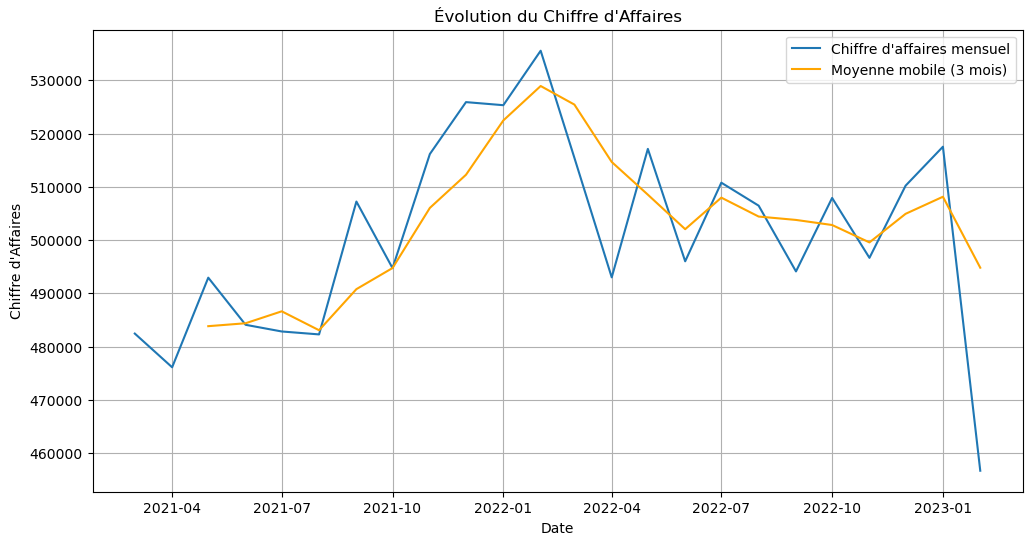

In [26]:
# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(ca_mensuel['date'], ca_mensuel['price'], label='Chiffre d\'affaires mensuel')
plt.plot(ca_mensuel['date'], ca_mensuel['moyenne_mobile'], label='Moyenne mobile (3 mois)', color='orange')
plt.title('Évolution du Chiffre d\'Affaires')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.grid()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Chiffre d'Affaires par Catégorie</h3>
</div> 


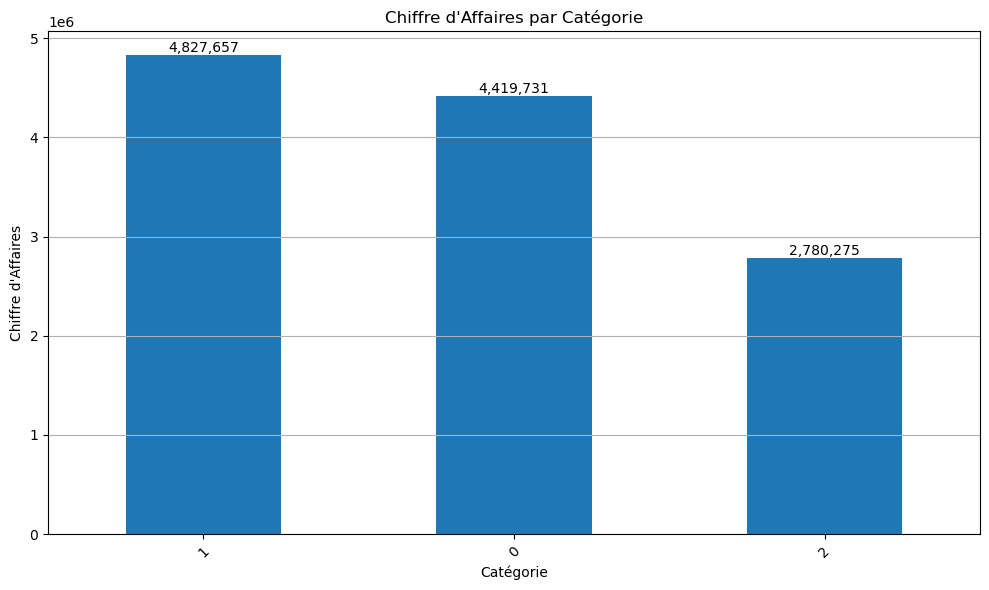

In [27]:
ca_categorie = df_final.groupby('categ')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ca_categorie.plot(kind='bar')
plt.title('Chiffre d\'Affaires par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Chiffre d\'Affaires')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, v in enumerate(ca_categorie):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.3 - Nombre de Clients par Mois</h3>
</div>

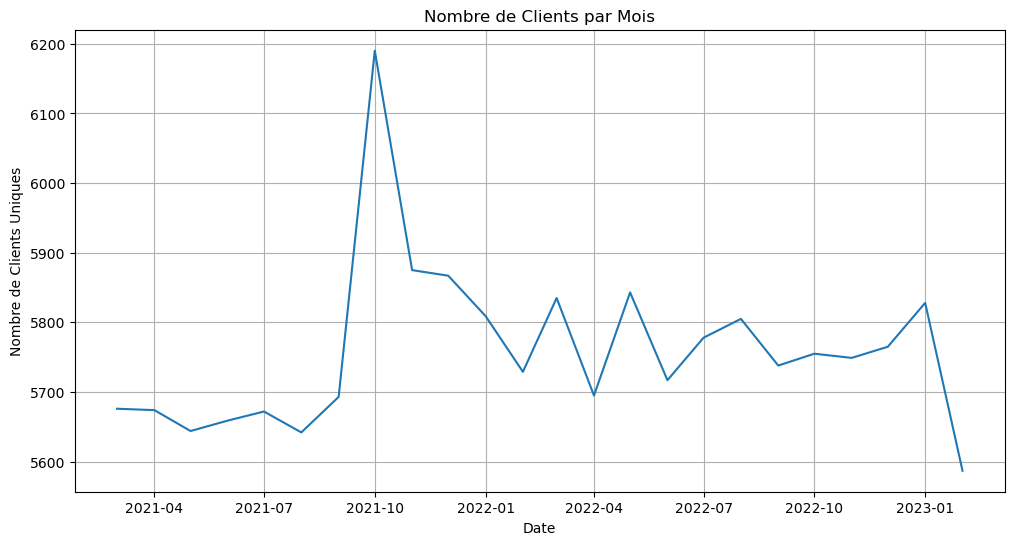

In [28]:
clients_par_mois = df_final.groupby(df_final['date'].dt.to_period('M'))['client_id'].nunique().reset_index()
clients_par_mois['date'] = clients_par_mois['date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(clients_par_mois['date'], clients_par_mois['client_id'])
plt.title('Nombre de Clients par Mois')
plt.xlabel('Date')
plt.ylabel('Nombre de Clients Uniques')
plt.grid()
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.4 - Nombre de transactions et produits vendus</h3>
</div>

In [29]:
transaction_mois = df_final.groupby(df_final['date'].dt.to_period('M'))['id_prod'].nunique().reset_index()
transaction_mois['date'] = transaction_mois['date'].dt.to_timestamp()


In [30]:
transactions = df_final['session_id'].nunique()
produits_vendus = df_final['id_prod'].count()
print(f"Nombre total de transactions : {transactions}")
print(f"Nombre total de produits vendus : {produits_vendus}")


Nombre total de transactions : 345505
Nombre total de produits vendus : 687534


In [31]:
#CA par mois pour chaque produit
ca_par_produit = df_final.groupby([df_final['date'].dt.to_period('M'), 'id_prod'])['price'].sum().reset_index()
ca_par_produit['date'] = ca_par_produit['date'].dt.to_timestamp()

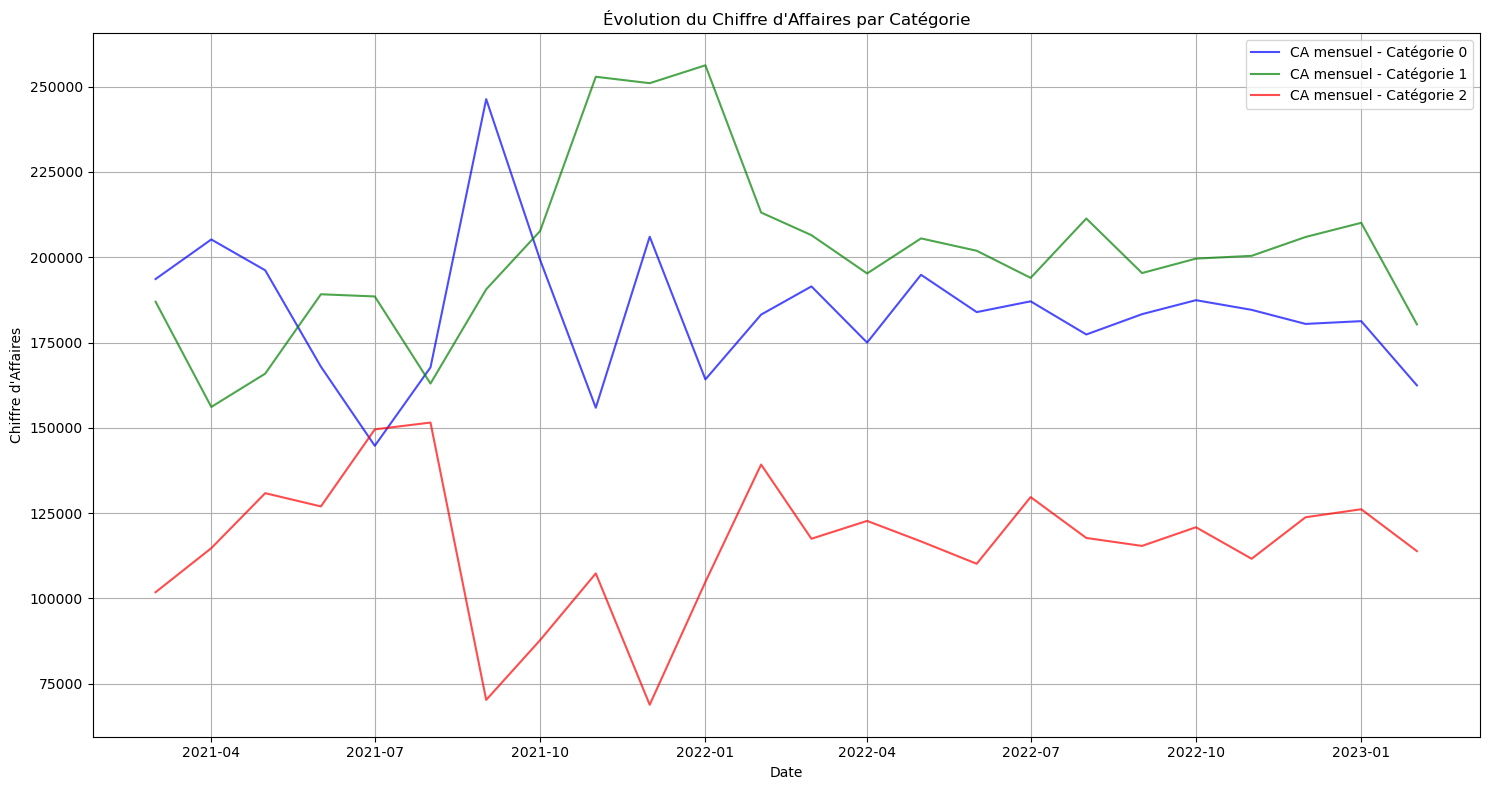

In [32]:
ca_mensuel = df_final.groupby([df_final['date'].dt.to_period('M'), 'categ'])['price'].sum().reset_index()
ca_mensuel['date'] = ca_mensuel['date'].dt.to_timestamp()

# Pivoter le DataFrame pour avoir une colonne par catégorie
ca_mensuel_pivot = ca_mensuel.pivot(index='date', columns='categ', values='price').reset_index()
ca_mensuel_pivot.columns.name = None
ca_mensuel_pivot = ca_mensuel_pivot.rename(columns={0: 'cat_0', 1: 'cat_1', 2: 'cat_2'})

# Créer le graphique
plt.figure(figsize=(15, 8))

# Couleurs pour chaque catégorie
colors = ['blue', 'green', 'red']

# Tracer les lignes pour chaque catégorie
for i, cat in enumerate(['cat_0', 'cat_1', 'cat_2']):
    plt.plot(ca_mensuel_pivot['date'], ca_mensuel_pivot[cat], 
             label=f'CA mensuel - Catégorie {i}', color=colors[i], alpha=0.7)
   

plt.title('Évolution du Chiffre d\'Affaires par Catégorie')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse des références</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Top et flop des produits</h3>
</div>

In [33]:
# Calculer les meilleurs et pires produits
top_produits = df_final.groupby('id_prod')['price'].sum().nlargest(10)
flop_produits = df_final.groupby('id_prod')['price'].sum().nsmallest(10)
#Convertir en DataFrame pour une meilleure présentation
top_produits_df = top_produits.reset_index()
flop_produits_df = flop_produits.reset_index()
# Renommer les colonnes pour plus de clarté
top_produits_df.columns = ['ID Produit', 'Montant Total des Ventes']
flop_produits_df.columns = ['ID Produit', 'Montant Total des Ventes']
# Afficher les tableaux
print("Les Meilleurs Produits")
display(top_produits_df)
print("\nLes Pires Produits")
display(flop_produits_df)

Les Meilleurs Produits


,ID Produit,Montant Total des Ventes
0,2_159,94893.50
1,2_135,69334.95
2,2_112,65407.76
3,2_102,60736.78
4,2_209,56971.86
5,1_395,56617.47
6,1_369,56136.60
7,2_110,53846.25
8,1_383,53834.43
9,1_414,53522.18



Les Pires Produits


,ID Produit,Montant Total des Ventes
0,0_1539,0.99
1,0_1284,1.38
2,0_1653,1.98
3,0_1601,1.99
4,0_541,1.99
5,0_807,1.99
6,0_1728,2.27
7,0_1498,2.48
8,0_898,2.54
9,0_1840,2.56


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse de ca pour identifier les BtB</h3>
</div> 

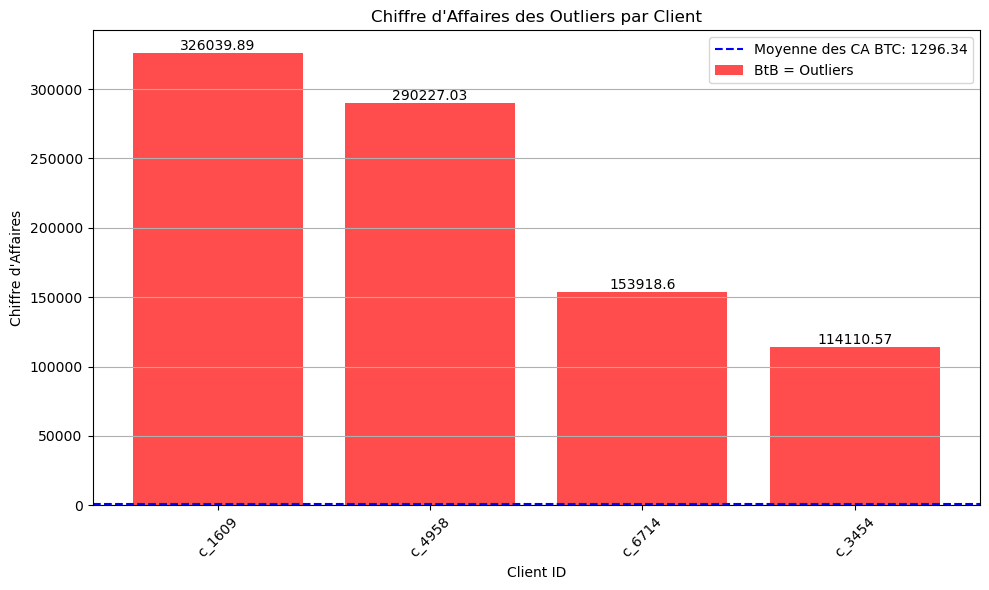

In [34]:
# Calculer le chiffre d'affaires par client
ca_par_clients = df_final.groupby('client_id')['price'].sum().sort_values(ascending=False)

# Calculer les scores Z
z_score = stats.zscore(ca_par_clients)

# Identifier les valeurs extrêmes
extreme_values_z = (z_score > 3) | (z_score < -3)

# Afficher les clients identifiés comme outliers
outliers = ca_par_clients[extreme_values_z]

# Calculer la moyenne des clients non outliers
mean_non_outliers = ca_par_clients[~extreme_values_z].mean()

# Visualiser uniquement les outliers et ajouter la moyenne
plt.figure(figsize=(10, 6))
bars = plt.bar(outliers.index, outliers.values, color='red', alpha=0.7, label='BtB = Outliers')

# Ajouter une barre pour la moyenne des non-outliers
plt.axhline(mean_non_outliers, color='blue', linestyle='--', label=f'Moyenne des CA BTC: {mean_non_outliers:.2f}')

# Ajouter le montant au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Chiffre d\'Affaires des Outliers par Client')
plt.xlabel('Client ID')
plt.ylabel('Chiffre d\'Affaires')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse de CA par tranche d'age catégorie produit</h3>
</div> 

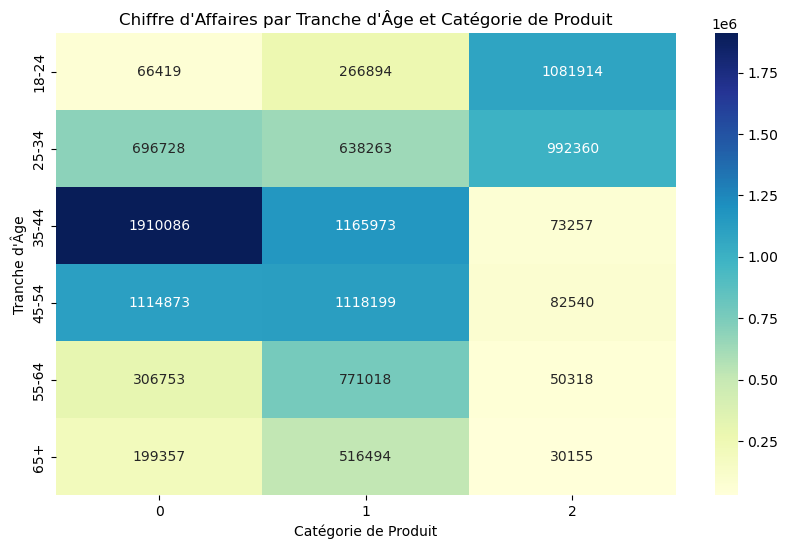

In [35]:
# Créer des tranches d'âge
bins = [18, 24, 34, 44, 54, 64, 74]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels)

# Calculer le chiffre d'affaires par tranche d'âge et catégorie
ca_by_age_categ = df_final.groupby(['age_group', 'categ'], observed=True)['price'].sum().unstack(fill_value=0)

# Visualiser avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ca_by_age_categ, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Chiffre d\'Affaires par Tranche d\'Âge et Catégorie de Produit')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Tranche d\'Âge')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Lien entre le Genre et les Catégories des Livres Achetés</h3>
</div> 

<Figure size 1200x600 with 0 Axes>

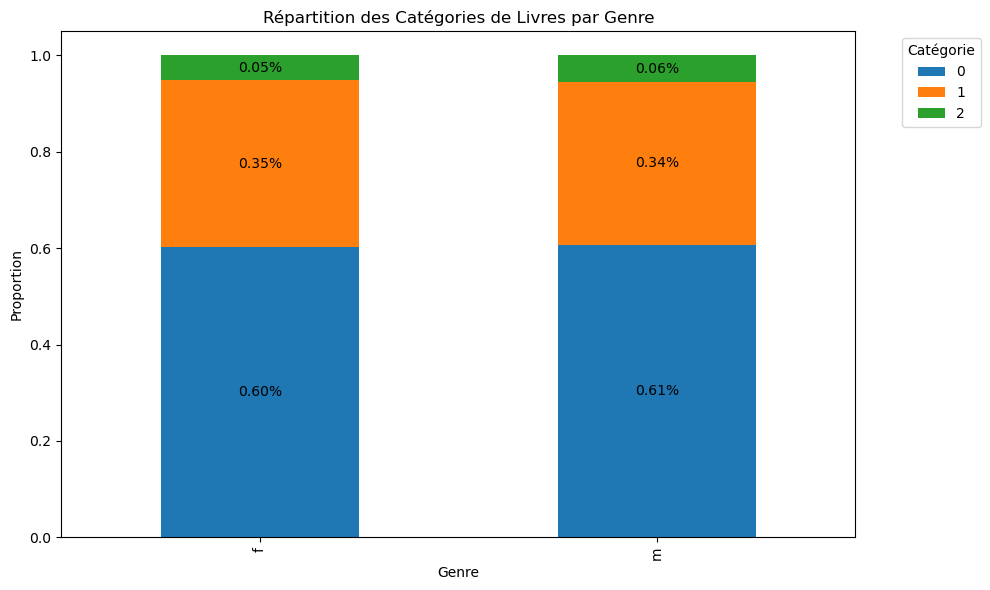

In [36]:
genre_categorie = pd.crosstab(df_final['sex'], df_final['categ'])
genre_categorie_norm = genre_categorie.div(genre_categorie.sum(axis=1), axis=0)
# Créer le graphique à barres empilées
plt.figure(figsize=(12, 6))
ax = genre_categorie_norm .plot(kind='bar', stacked=True, figsize=(10, 6))
# Personnaliser le graphique
plt.title('Répartition des Catégories de Livres par Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Ajouter les pourcentages sur les barres
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center')

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); >Etape 5.3 - Répartition des produits par catégorie</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 -Répartition des produits par catégorie</h3>
</div>

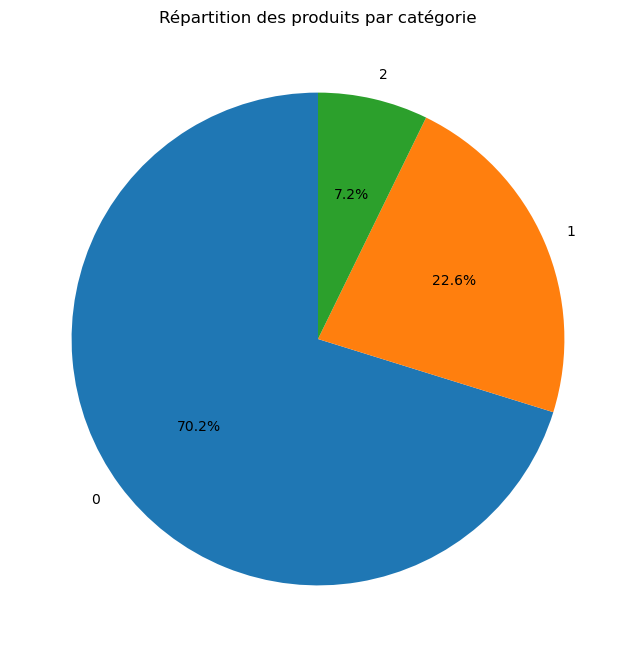

In [37]:
#Agrégation des données
repartition_categorie = df_final.groupby('categ')['id_prod'].nunique()
#Tracé du graphique en camembert
plt.figure(figsize=(8, 8))  # Taille de la figure
repartition_categorie.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Personnaliser le graphique
plt.title('Répartition des produits par catégorie')
plt.ylabel('') 
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Profil des clients</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.1 - Chiffre d'affaires BtoB vs BtoC</h3>
</div>

In [38]:
# Calculer le nombre de lignes et le montant total des outliers
nombre_outliers = outliers.count()  # Nombre de clients outliers
montant_total_outliers = outliers.sum()  # Somme des chiffres d'affaires des outliers
print(f"Nombre client BtoB : {nombre_outliers}")
print(f"CA BtoB : {montant_total_outliers:.2f}")
# Calculer le nombre de lignes et le montant total des non-outliers
non_outliers = ca_par_clients[~extreme_values_z]  # Filtrer les non-outliers
nombre_non_outliers = non_outliers.count()  # Nombre de clients non outliers
montant_total_non_outliers = non_outliers.sum()  # Somme des chiffres d'affaires des non outliers

print(f"Nombre client BtoC : {nombre_non_outliers}")
print(f"CA BtoC : {montant_total_non_outliers:.2f}")



Nombre client BtoB : 4
CA BtoB : 884296.09
Nombre client BtoC : 8596
CA BtoC : 11143367.01


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 6.2 -Répartition par catégorie</h3>
</div>

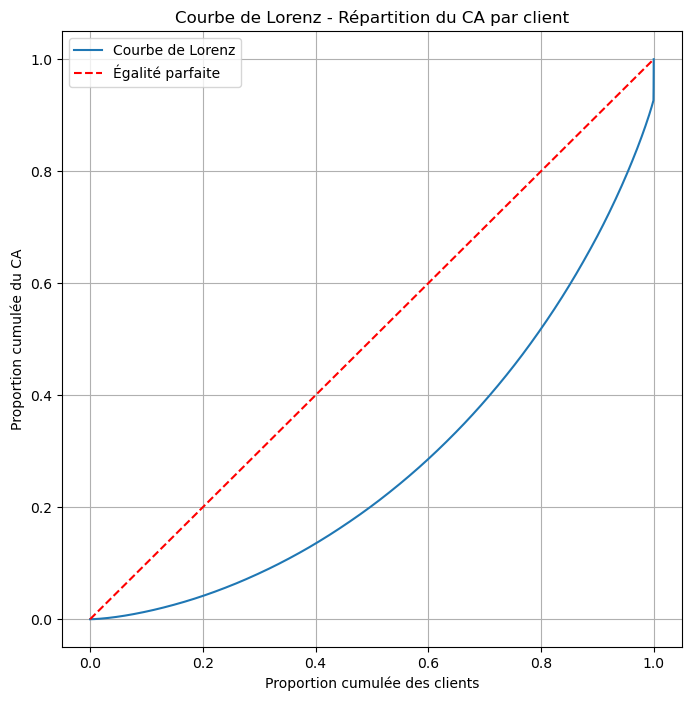

Inequality Index: 0.72
Interprétation : Répartition très inégale : une très petite proportion des clients génère presque tout le CA.


In [39]:
# Calcul du CA par client
ca_clients = df_final.groupby('client_id')['price'].sum().sort_values()

# Calcul de la courbe de Lorenz
lorenz = ca_clients.cumsum() / ca_clients.sum()

# Ajout d'un point (0, 0) pour commencer à l'origine
lorenz = np.insert(lorenz.values, 0, 0)

# Axe des x : proportion cumulative des clients
x = np.linspace(0, 1, len(lorenz))

# Tracé de la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(x, lorenz, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], 'r--', label="Égalité parfaite")
plt.title('Courbe de Lorenz - Répartition du CA par client')
plt.xlabel("Proportion cumulée des clients")
plt.ylabel("Proportion cumulée du CA")
plt.legend()
plt.grid()
plt.show()

# Interprétation automatique
inequality = 1 - lorenz.mean()  # Mesure simple d'inégalité (proche du Gini)
if inequality < 0.2:
    interpretation = "Répartition presque équitable : le CA est réparti de manière homogène entre les clients."
elif inequality < 0.4:
    interpretation = "Répartition modérément inégale : une partie des clients contribue davantage au CA."
elif inequality < 0.6:
    interpretation = "Répartition inégale : une minorité des clients génère une grande partie du CA."
else:
    interpretation = "Répartition très inégale : une très petite proportion des clients génère presque tout le CA."

print(f"Inequality Index: {inequality:.2f}")
print("Interprétation :", interpretation)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Corrélations</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.1 - Répartition des Catégories de Livres par Genre</h3>
</div> 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.1 - Genre et catégories de livres</h3>
</div> 

7.1.1 Vérification des Hypothèses

Vérification des Hypothèses
Nature des Données

    Genre : Variable catégorielle binaire (par exemple, Homme/Femme ou codée 0/1).
    Catégories de Livres : Variable catégorielle ordinale.

Observations des Données

    Les deux variables sont quantitatives, ce qui permet d'utiliser des méthodes de corrélation pour évaluer la relation entre elles.

Choix du Test

    Nom du Test : Test de corrélation de Spearman.
    Pré-requis : Les deux variables doivent être quantitatives. Les données ne doivent pas nécessairement suivre une distribution normale.

Hypothèses du Test

    Hypothèse nulle (H0) : Il n'y a pas de corrélation entre l'âge et la fréquence d'achat.
    Hypothèse alternative (H1) : Il existe une corrélation entre l'âge et la fréquence d'achat.



In [40]:
# 7.1.2 test du chi-carré


contingency_table = pd.crosstab(df_final['sex'], df_final['categ'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique du chi-carré : {chi2}")
print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")

print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe une relation significative entre le genre et les catégories de livres.")
else:
    print("Il n'y a pas de relation significative entre le genre et les catégories de livres.")

# Mesure de l'intensité de l'association
n = contingency_table.sum().sum()
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Coefficient V de Cramer : {cramer_v}")


Statistique du chi-carré : 158.25417617304882
Valeur p : 4.3205822283997063e-35
Degrés de liberté : 2
Valeur p : 4.3205822283997063e-35
Degrés de liberté : 2
Il existe une relation significative entre le genre et les catégories de livres.
Coefficient V de Cramer : 0.015171569112675852


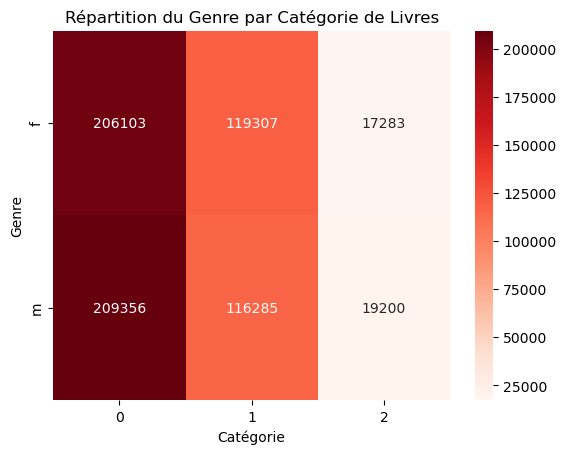

In [41]:
# Heatmap pour visualiser la table de contingence voir avec des coefficient chi2
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds')
plt.title('Répartition du Genre par Catégorie de Livres')
plt.xlabel('Catégorie')
plt.ylabel('Genre')
plt.show()

Ce test analyse la relation entre le genre des clients et les catégories de livres achetés. Le résultat indique qu'il existe une relation significative entre le genre et les catégories de livres (valeur p < 0.05). En d'autres termes, le genre influence les choix de catégories de livres par les clients.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.2 -Age et montant total des achats</h3>
</div> 


7.2.1 Vérification des Hypothèses
Nature des Données Variables

    Âge : Variable quantitative continue, représentant l'âge des clients.
    Montant Total des Achats : Variable quantitative continue, représentant le total des achats effectués par chaque client.

Observation


    Ces deux variables sont quantitatives continues, ce qui permet d'utiliser des méthodes de corrélation pour évaluer la relation entre elles. Comme les données ne suivent pas une loi normale, le test de Pearson est impossible.

Choix de Test

    Type de Test : Spearman.
    Pré-requis : Les deux variables doivent être quantitatives. Les données ne doivent pas nécessairement suivre une distribution normale.

Hypothèses du Test

    Hypothèse Nulle (H0) : Il n'y a pas de corrélation entre l'âge et le montant total des achats.
    Hypothèse Alternative (H1) : Il existe une corrélation significative entre l'âge et le montant total des achats.




In [42]:
# 7.2.1 Calculer le montant total des achats et le nombre de sessions par client
ca_par_clients = df_final.groupby('client_id').agg(
    montant_total=('price', 'sum'),      # Somme des prix
    nombre_sessions=('price', 'count'),   # Compte des sessions (nombre d'achats)
    age=('age', 'first'),                 # Prendre l'âge (première valeur)
    sex=('sex', 'first'),                 # Prendre le sexe (première valeur)
    age_group=('age_group', 'first'),
    panier_moyen= ('price','mean')
    # Prendre le groupe d'âge (première valeur)
).reset_index()

# Afficher le résultat
print("Montant total des achats, nombre de sessions et informations sur les clients :")
display(ca_par_clients)


Montant total des achats, nombre de sessions et informations sur les clients :


,client_id,montant_total,nombre_sessions,age,sex,age_group,panier_moyen
0,c_1,629.02,43,67,m,65+,14.628372
1,c_10,1353.60,58,66,m,65+,23.337931
2,c_100,254.85,8,30,m,25-34,31.856250
3,c_1000,2291.88,126,56,f,55-64,18.189524
4,c_1001,1823.85,103,40,m,35-44,17.707282
...,...,...,...,...,...,...,...
8595,c_995,189.41,14,67,m,65+,13.529286
8596,c_996,1637.34,96,52,f,45-54,17.055625
8597,c_997,1490.01,59,28,f,25-34,25.254407
8598,c_998,2822.22,55,21,m,18-24,51.313091


In [43]:
# Convertir l'index de outliers en liste
clients_a_supprimer = outliers.index.tolist()
clients_a_supprimer

['c_1609', 'c_4958', 'c_6714', 'c_3454']

In [44]:

# Supprimer les lignes avec ces client_id
ca_par_clients_btc = ca_par_clients[~ca_par_clients['client_id'].isin(clients_a_supprimer)]

# Afficher le DataFrame après suppression
print("\nDataFrame après suppression des clients :")
display(ca_par_clients_btc)



DataFrame après suppression des clients :


,client_id,montant_total,nombre_sessions,age,sex,age_group,panier_moyen
0,c_1,629.02,43,67,m,65+,14.628372
1,c_10,1353.60,58,66,m,65+,23.337931
2,c_100,254.85,8,30,m,25-34,31.856250
3,c_1000,2291.88,126,56,f,55-64,18.189524
4,c_1001,1823.85,103,40,m,35-44,17.707282
...,...,...,...,...,...,...,...
8595,c_995,189.41,14,67,m,65+,13.529286
8596,c_996,1637.34,96,52,f,45-54,17.055625
8597,c_997,1490.01,59,28,f,25-34,25.254407
8598,c_998,2822.22,55,21,m,18-24,51.313091


In [45]:
# 7.2.2 Fonction pour calculer la corrélation de Spearman
def correlation_spearman(x, y, label_x, label_y):
    corr, p_value = stats.spearmanr(x, y)
    print(f"Corrélation de Spearman entre {label_x} et {label_y}:")
    print(f"Coefficient de correlation : {corr}")
    print(f"Valeur p : {p_value}")
    
    if p_value < 0.05:
        print("Il existe une corrélation significative.")
    else:
        print("Il n'y a pas de corrélation significative.")
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    plt.title(f"{label_x} vs {label_y}")
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

Corrélation de Spearman entre Age et Montant Total des Achats:
Coefficient de correlation : -0.18453804793783096
Valeur p : 1.0212910436382683e-66
Il existe une corrélation significative.


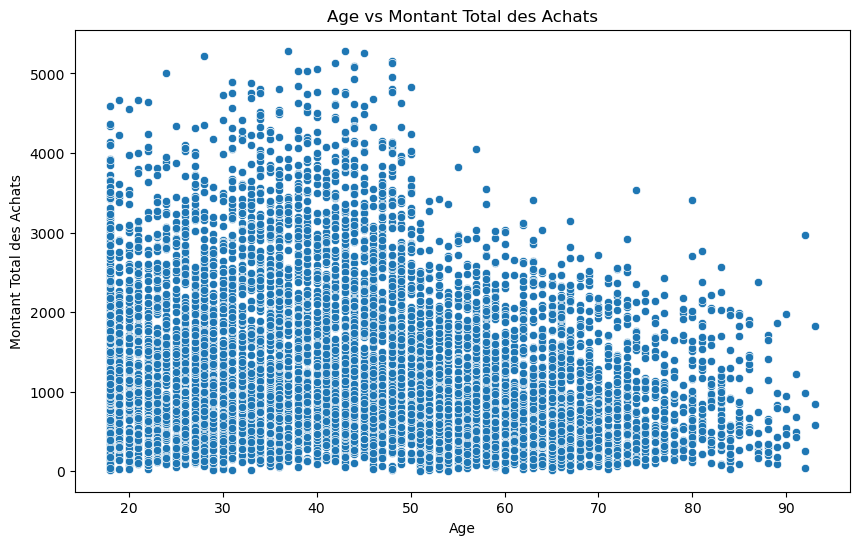

In [46]:
# Étape 7.2.3 - Âge et montant total des achats
correlation_spearman(ca_par_clients_btc['age'], ca_par_clients_btc['montant_total'], "Age", "Montant Total des Achats")


Ce test examine la relation entre l'âge des clients et le montant total de leurs achats.
Le résultat montre qu'il existe une relation significative entre ces deux variables (valeur p < 0.05).
En d'autres termes, l'âge des clients a un impact sur le montant total de leurs achats.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.3 - Age et fréquence d'achat</h3>
</div>

7.3.1 Vérification des Hypothèses

Vérification des Hypothèses
Nature des Données

    Âge : Variable quantitative continue représentant l'âge des clients.
    Fréquence d'Achat : Variable quantitative discrète représentant le nombre total d'achats effectués par chaque client.

Observations des Données

    Les deux variables sont quantitatives, ce qui permet d'utiliser des méthodes de corrélation pour évaluer la relation entre elles.

Choix du Test

    Nom du Test : Test de corrélation de Spearman.
    Pré-requis : Les deux variables doivent être quantitatives. Les données ne doivent pas nécessairement suivre une distribution normale.

Hypothèses du Test

    Hypothèse nulle (H0) : Il n'y a pas de corrélation entre l'âge et la fréquence d'achat.
    Hypothèse alternative (H1) : Il existe une corrélation entre l'âge et la fréquence d'achat.


Corrélation de Spearman entre Âge et Taille du panier moyen:
Coefficient de correlation : 0.12766191018445167
Valeur p : 1.4497470156818763e-32
Il existe une corrélation significative.


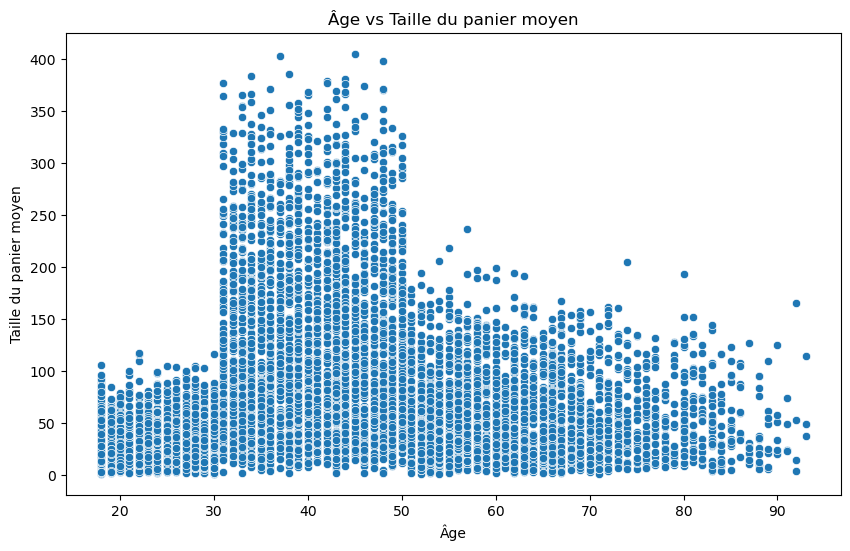

In [47]:
# Agréger l'âge et le nombre de sessions

correlation_spearman(ca_par_clients_btc['age'], ca_par_clients_btc['nombre_sessions'], "Âge", "Taille du panier moyen")


Ce test évalue la relation entre l'âge des clients et la taille de leur panier moyen. Le résultat indique qu'il existe une relation significative entre ces deux variables (valeur p < 0.05). En d'autres termes, l'âge des clients influence la taille de leur panier moyen.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.4 - Age et taille du panier moyen</h3>
</div> 

7.4.1 Vérification des Hypothèses

Nature des Données

    Âge : Variable continue représentant l'âge des clients.
    Fréquence d'Achat : Variable discrète représentant le nombre total d'achats effectués par chaque client.

Observations des Données

    Les deux variables sont quantitatives, ce qui permet d'utiliser des méthodes de corrélation pour évaluer la relation entre elles.

Choix du Test

    Nom du Test : Test de corrélation de Spearman.
    Pré-requis : Les deux variables doivent être quantitatives. Les données ne doivent pas nécessairement suivre une distribution normale.

Hypothèses du Test

    Hypothèse nulle (H0) : Il n'y a pas de corrélation entre l'âge et la fréquence d'achat.
    Hypothèse alternative (H1) : Il existe une corrélation entre l'âge et la fréquence d'achat.



Corrélation de Spearman entre Âge et Taille du panier moyen:
Coefficient de correlation : -0.32586821258009735
Valeur p : 8.352869998649883e-212
Il existe une corrélation significative.


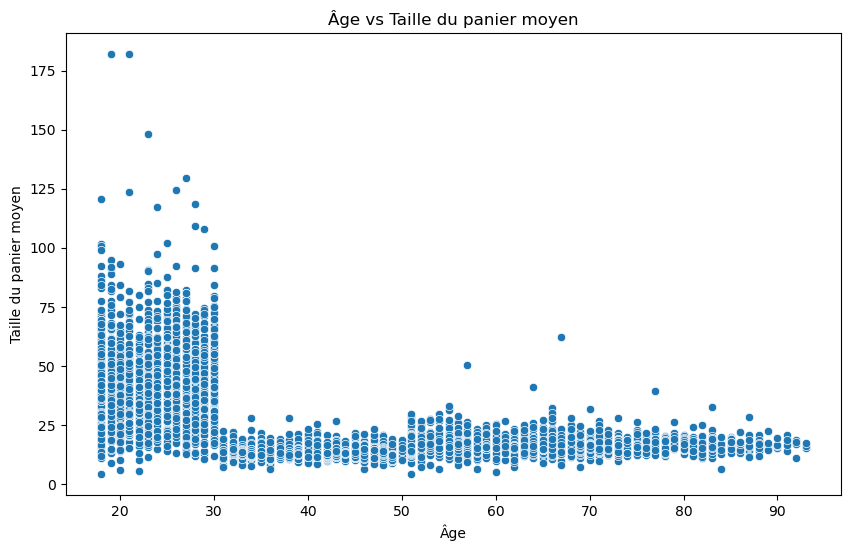

In [48]:
correlation_spearman(ca_par_clients_btc['age'], ca_par_clients_btc['panier_moyen'], "Âge", "Taille du panier moyen")

Ce test évalue la relation entre l'âge des clients et la taille de leur panier moyen.
Le résultat indique qu'il existe une relation significative entre ces deux variables (valeur p < 0.05). 
En d'autres termes, l'âge des clients influence la taille de leur panier moyen.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 7.5 - Age et catégorie des livres achetés</h3>
</div> 

7.5.1 Vérification des Hypothèses

Nature des Données

    Âge : Variable quantitative continue représentant l'âge des clients.
    Catégorie des Livres : Variable catégorielle représentant les différentes catégories de livres achetés (ex. fiction, non-fiction, science-fiction, etc.).

Observations des Données

    Les données sont collectées à partir d'un ensemble d'achats de livres, où chaque client a un âge associé et a acheté des livres dans différentes catégories. L'analyse vise à explorer si l'âge des clients influence les catégories de livres qu'ils achètent.

Choix du Test

    Nom du Test : Kruskal-Wallis.
    Pré-requis : Les données doivent être indépendantes. Les échantillons doivent être issus de populations avec des distributions similaires (bien que le test de Kruskal-Wallis soit robuste à cette hypothèse). La variable dépendante (âge) doit être mesurée sur une échelle ordinale ou continue.

Hypothèses du Test

    Hypothèse nulle (H0) : Il n'y a pas de différence significative dans la distribution de l'âge entre les différentes catégories de livres.
    Hypothèse alternative (H1) : Il existe une différence significative dans la distribution de l'âge entre les différentes catégories de livres.


Test de Kruskal-Wallis pour age et catégorie des livres:
Statistique H : 78458.43837285662
Valeur p : 0.0
Il existe une différence significative dans la distribution de l'âge entre les catégories de livres.


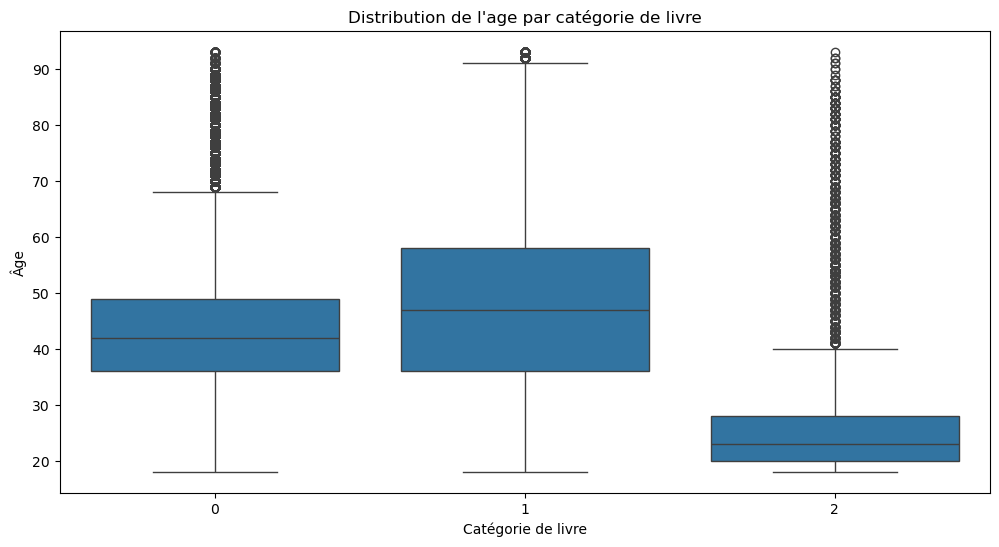

In [49]:

# Préparation des données pour le test
categories = df_final['categ'].unique()
age_par_categorie = [df_final[df_final['categ'] == cat]['age'] for cat in categories]

# Test de Kruskal-Wallis
h_statistic, p_value = kruskal(*age_par_categorie)

print("Test de Kruskal-Wallis pour age et catégorie des livres:")
print(f"Statistique H : {h_statistic}")
print(f"Valeur p : {p_value}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe une différence significative dans la distribution de l'âge entre les catégories de livres.")
else:
    print("Il n'y a pas de différence significative dans la distribution de l'âge entre les catégories de livres.")

# Visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(x='categ', y='age', data=df_final)
plt.title("Distribution de l'age par catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.ylabel("Âge")
plt.show()



Ce test compare l'âge entre différentes catégories de livres.
Le résultat montre qu'il existe des différences significatives dans la répartition des âges selon les catégories de livres (valeur p = inférieur à 0.05).
En d'autres termes, certaines catégories de livres sont plus populaires parmi certains groupes d'âge que parmi d'autres.
